# Data Engineer Skills Assignment

## Data Engineer Skills Test (HSM2) - Context

### Instructions:
Please prepare code in R or Python to answer the following questions. You will need to source data files from the UK synthetic cancer registry data (Simulacrum*) available from:

[Simulacrum Health Data Insight](https://simulacrum.healthdatainsight.org.uk/)

Using the latest version of the UK synthetic cancer registry data (Simulacrum), and focusing on the **patients and tumours dataset**, please complete the following tasks:

1. **Ingest the data**  
2. **Provide a summary of missing values** contained in the dataset.  
3. **Create a new column** which contains the **year of VitalStatusDate**.  
4. **Summarise the data** by **age and sex distribution** of patients.  
5. **Summarise the comorbidities** of the patients in the dataset.  
6. **Ethnicity and Income Distribution**:  
   a) Summarise the percentage of each ethnic group for the most deprived income-level group.  
   b) Identify which ethnic groups have a higher proportion of lower income earners within them.

### Submission Details:
Please send in your code and outputs by **11:59pm Wednesday, 19th February** to:  
- **maria.quilantang@health.nsw.gov.au**  
- **joshua.herden@health.nsw.gov.au**

---

*Data used is artificial data from the Simulacrum, a synthetic dataset developed by Health Data Insight CiC, derived from anonymous cancer data provided by the National Cancer Registration and Analysis Service, which is part of Public Health England.*

## Cancer Institute NSW - Data Engineer Skills Test

**Author:** Dylan Bai  
**Date:** 18th February 2024

---

### Script Overview

This script is developed to complete the assignment provided by the **Cancer Institute NSW** as part of the **Data Engineer** position application. The purpose of this script is to process and analyse synthetic cancer registry data from the UK **Simulacrum v2.1.0** dataset, following the tasks outlined in the assignment.

#### Key Steps:
1. **Data Ingestion**: The script loads the synthetic cancer registry dataset and prepares it for analysis.
2. **Data Cleaning**: It performs necessary data cleaning steps, including handling missing values, correcting data types, and ensuring data integrity.
3. **Data Analysis**: The script carries out various data analysis tasks, focusing on summarising patient demographics, comorbidities, and ethnic income distribution.
4. **Visualisation**: Visualisations are created using the **matplotlib** and **seaborn** libraries to provide clear insights into the dataset.

#### Libraries Used:
- **pandas**: Utilised for data manipulation and cleaning, including handling missing values, data transformations, and aggregations.
- **matplotlib**: Used for generating basic visualisations such as histograms and bar charts.
- **seaborn**: Provides enhanced visualisations, particularly for statistical plots like distributions and categorical summaries.

The script is written in **Python** and adheres to the specifications and analysis requirements outlined in the assignment brief.


In [1]:
# ----------------------------
# Section 1: Import Required Modules
# ----------------------------
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualisation
import seaborn as sns  # For enhanced data visualisation

# Set the style for seaborn plots
sns.set(style="whitegrid")

In [2]:
# ----------------------------
# Section 2: Define File Paths
# ----------------------------
# File paths for datasets
patients_file_path = r"C:\Users\dylanbai\3.0 Dyl Personal Stuff\JA\2025 Job Applications\Job Applications\NSW Health - Data Engineer\Homework\simulacrum_v2.1.0\Data\sim_av_patient.csv"
tumours_file_path = r"C:\Users\dylanbai\3.0 Dyl Personal Stuff\JA\2025 Job Applications\Job Applications\NSW Health - Data Engineer\Homework\simulacrum_v2.1.0\Data\sim_av_tumour.csv"
lookup_tables_file_path = r"C:\Users\dylanbai\3.0 Dyl Personal Stuff\JA\2025 Job Applications\Job Applications\NSW Health - Data Engineer\Homework\simulacrum_v2.1.0\Documents\all_z_lookup_tables.xlsx"

# Columns used in the analysis
# Patients dataset columns: 'PATIENTID', 'GENDER', 'ETHNICITY', 'VITALSTATUS', 'VITALSTATUSDATE', 'QUINTILE_2019'
# Tumours dataset columns: 'PATIENTID', 'AGE', 'COMORBIDITIES_27_03', 'BEHAVIOUR_ICD10_O2', 'GRADE', 'STAGE_BEST'

#### Section 3: Load Lookup Tables

In this section, we load and process various lookup tables that provide mappings for categorical values within the dataset. These lookup tables contain codes and their corresponding descriptions for several key variables, such as gender, ethnicity, vital status, and cancer-related details.

##### Steps:
1. **Loading Lookup Tables**:  
   The lookup tables are read from an Excel file using the `pd.read_excel` function, with the `sheet_name=None` argument to load all sheets into a dictionary.

2. **Creating Lookup Dictionaries**:  
   A dictionary is created for each lookup table by mapping the 'Code' column to the 'Description' column. These dictionaries are stored in the `lookup_dicts` dictionary, where each key corresponds to a specific variable (e.g., 'gender', 'ethnicity', 'stage') and each value is a dictionary of codes to descriptions.
   
   For example:
   - The 'gender' dictionary maps gender codes (e.g., 1 for male, 2 for female) to their respective descriptions (e.g., 'Male', 'Female').
   - Similarly, other dictionaries are created for variables such as 'ethnicity', 'vital status', 'death location', 'stage', and more.

This section is essential for mapping raw numerical or coded data to meaningful categorical descriptions, which will help in analysing and interpreting the dataset.

In [4]:
# ----------------------------
# Section 3: Load Lookup Tables
# ----------------------------
# Load and process lookup tables
lookup_tables = pd.read_excel(lookup_tables_file_path, sheet_name=None)

# Create lookup dictionaries
lookup_dicts = {
    'gender': dict(zip(lookup_tables['z_gender']['Code'], lookup_tables['z_gender']['Description'])),
    'ethnicity': dict(zip(lookup_tables['z_ethnicity']['Code'], lookup_tables['z_ethnicity']['Description'])),
    'vitalstatus': dict(zip(lookup_tables['z_vitalstatus']['Code'], lookup_tables['z_vitalstatus']['Description'])),
    'deathlocation': dict(zip(lookup_tables['z_deathlocationcode']['Code'], lookup_tables['z_deathlocationcode']['Description'])),
    'stage': dict(zip(lookup_tables['z_stage']['Code'], lookup_tables['z_stage']['Description'])),
    'comorbidities': dict(zip(lookup_tables['z_comorbidities']['Code'], lookup_tables['z_comorbidities']['Description'])),
    'behaviour': dict(zip(lookup_tables['z_behaviour']['Code'], lookup_tables['z_behaviour']['Description'])),
    'cancercareplanintent': dict(zip(lookup_tables['z_cancercareplanintent']['Code'], lookup_tables['z_cancercareplanintent']['Description'])),
    'grade': dict(zip(lookup_tables['z_grade']['Code'], lookup_tables['z_grade']['Description'])),
    'laterality': dict(zip(lookup_tables['z_laterality']['Code'], lookup_tables['z_laterality']['Description'])),
    'performancestatus': dict(zip(lookup_tables['z_performancestatus']['Code'], lookup_tables['z_performancestatus']['Description']))
}

In [5]:
# ----------------------------
# Section 4: Load and Preview Data
# ----------------------------
# Load datasets
patients = pd.read_csv(patients_file_path)
tumours = pd.read_csv(tumours_file_path)

# Display dataset previews
print("Dataset Previews:")
for name, df in [("Patients", patients), ("Tumours", tumours)]:
    print(f"\n{name} dataset preview:")
    print(df.head())
    print(f"\nShape: {df.shape}")

C:\Users\dylanbai\AppData\Local\Temp\ipykernel_3980\2165571434.py:6: DtypeWarning: Columns (14,15,16,17,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  tumours = pd.read_csv(tumours_file_path)


Dataset Previews:

Patients dataset preview:
   PATIENTID  GENDER ETHNICITY DEATHCAUSECODE_1A DEATHCAUSECODE_1B  \
0   10000001       1         A               NaN               NaN   
1   10000002       1       NaN               NaN               NaN   
2   10000003       2         A               NaN               NaN   
3   10000004       1         A               NaN               NaN   
4   10000005       1         A               NaN               NaN   

  DEATHCAUSECODE_1C DEATHCAUSECODE_2 DEATHCAUSECODE_UNDERLYING  \
0               NaN              NaN                       NaN   
1               NaN              NaN                       NaN   
2               NaN              NaN                       NaN   
3               NaN              NaN                       NaN   
4               NaN              NaN                       NaN   

  DEATHLOCATIONCODE VITALSTATUS VITALSTATUSDATE  LINKNUMBER  
0               NaN           A      2022-07-05   101610884  
1            

#### Dataset Features

##### Patients Dataset:
- **Shape**: (1,871,605 rows, 12 columns)
- **Key Features**:
  - `PATIENTID`: Unique identifier for each patient.
  - `GENDER`: Patient's gender (coded).
  - `ETHNICITY`: Patient's ethnicity (coded).
  - `DEATHCAUSECODE_1A`, `DEATHCAUSECODE_1B`, `DEATHCAUSECODE_1C`, `DEATHCAUSECODE_2`, `DEATHCAUSECODE_UNDERLYING`: Codes representing causes of death.
  - `DEATHLOCATIONCODE`: Code indicating the location of death.
  - `VITALSTATUS`: Vital status of the patient (e.g., alive or deceased).
  - `VITALSTATUSDATE`: Date when the vital status was recorded.
  - `LINKNUMBER`: A linking number, potentially used for record matching.

This dataset contains detailed demographic and vital status information for each patient.

---

##### Tumours Dataset:
- **Shape**: (1,995,570 rows, 37 columns)
- **Key Features**:
  - `TUMOURID`: Unique identifier for each tumour.
  - `GENDER`: Patient's gender (coded).
  - `PATIENTID`: Identifier linking to the corresponding patient in the Patients dataset.
  - `DIAGNOSISDATEBEST`: Date of the best diagnosis for the tumour.
  - `SITE_ICD10_O2_3CHAR`: ICD-10 code for the site of the tumour.
  - `SITE_ICD10_O2`, `SITE_ICD10R4_O2_3CHAR_FROM2013`: Additional ICD-10 site coding.
  - `QUINTILE_2019`: Deprivation quintile indicating the socio-economic status.
  - `DATE_FIRST_SURGERY`: Date of the first surgery related to the tumour.
  - `CANCERCAREPLANINTENT`: Cancer care plan intent.
  - `PERFORMANCESTATUS`: Patient's performance status, indicating overall health.
  - `COMORBIDITIES_27_03`: Comorbidities associated with the patient.
  - `GLEASON_PRIMARY`, `GLEASON_SECONDARY`, `GLEASON_TERTIARY`: Gleason scores for prostate cancer staging.
  - `GLEASON_COMBINED`: Combined Gleason score.

This dataset contains tumour-specific information, including diagnosis, treatment, and additional tumour characteristics, and is linked to the corresponding patients in the Patients dataset.

#### Section 5: Merge Datasets - Link Patients and Tumours Datasets

This section of the code performs the following operations:
1. **Remove Duplicate Column**: The `GENDER` column is dropped from the `tumours` dataset, as both the `patients` and `tumours` datasets contain this column, and the `patients` dataset’s version is retained.
2. **Merge Datasets**: The `patients` and `tumours` datasets are merged using the `PATIENTID` column as the key. The `how='inner'` merge ensures only matching records from both datasets are included in the final dataset.
3. **Output Information**: After merging, the shape and column names of the merged dataset are printed, followed by a summary of the dataset using `.describe()` to provide descriptive statistics for the numeric columns.

The result is a combined dataset containing information from both patients and their associated tumours.

In [6]:
# ----------------------------
# Section 5: Merge Datasets - Link Patients and Tumours Datasets
# ----------------------------
# Drop the GENDER column from the tumours dataset
# Since both datasets have a GENDER column and they are identical, we only need one.
# We will keep the GENDER column from the patients dataset and drop the one from tumours.
# Finally, merge the datasets on PATIENTID
tumours = tumours.drop(columns=['GENDER'])  # Remove duplicate GENDER column
merged_data = pd.merge(patients, tumours, on='PATIENTID', how='inner')

print("\nMerged dataset information:")
print(f"Shape: {merged_data.shape}")
print("\nColumns:", merged_data.columns.tolist())
print("\nSummary statistics:")
print(merged_data.describe())


Merged dataset information:
Shape: (1995570, 47)

Columns: ['PATIENTID', 'GENDER', 'ETHNICITY', 'DEATHCAUSECODE_1A', 'DEATHCAUSECODE_1B', 'DEATHCAUSECODE_1C', 'DEATHCAUSECODE_2', 'DEATHCAUSECODE_UNDERLYING', 'DEATHLOCATIONCODE', 'VITALSTATUS', 'VITALSTATUSDATE', 'LINKNUMBER', 'TUMOURID', 'DIAGNOSISDATEBEST', 'SITE_ICD10_O2_3CHAR', 'SITE_ICD10_O2', 'SITE_ICD10R4_O2_3CHAR_FROM2013', 'SITE_ICD10R4_O2_FROM2013', 'SITE_ICDO3REV2011', 'SITE_ICDO3REV2011_3CHAR', 'MORPH_ICD10_O2', 'MORPH_ICDO3REV2011', 'BEHAVIOUR_ICD10_O2', 'BEHAVIOUR_ICDO3REV2011', 'T_BEST', 'N_BEST', 'M_BEST', 'STAGE_BEST', 'GRADE', 'AGE', 'CREG_CODE', 'STAGE_BEST_SYSTEM', 'LATERALITY', 'SCREENINGSTATUSFULL_CODE', 'ER_STATUS', 'PR_STATUS', 'HER2_STATUS', 'QUINTILE_2019', 'DATE_FIRST_SURGERY', 'CANCERCAREPLANINTENT', 'PERFORMANCESTATUS', 'CHRL_TOT_27_03', 'COMORBIDITIES_27_03', 'GLEASON_PRIMARY', 'GLEASON_SECONDARY', 'GLEASON_TERTIARY', 'GLEASON_COMBINED']

Summary statistics:
          PATIENTID        GENDER    LINKNUMBER 

The merged dataset contains **1,995,570 rows** and **47 columns**. Key features include:
- **Demographic and Vital Status Information**: Includes `PATIENTID`, `GENDER`, `ETHNICITY`, and `VITALSTATUS`.
- **Tumour Details**: Includes `TUMOURID`, `DIAGNOSISDATEBEST`, and various `SITE_ICD10` codes.
- **Cancer Characteristics**: Includes tumour staging (`STAGE_BEST`, `STAGE_BEST_SYSTEM`) and grade (`GRADE`), along with **Gleason scores** for prostate cancer.
- **Surgical and Treatment Information**: Includes `DATE_FIRST_SURGERY`, `CANCERCAREPLANINTENT`, and `PERFORMANCESTATUS`.
- **Statistical Summary**: Provides counts, means, and percentiles for numeric columns like `AGE`, `GLEASON_PRIMARY`, and `AGE`.

The dataset combines patient and tumour data for further analysis and modeling.

In [7]:
# ----------------------------
# Section 6: Apply Lookup Tables
# ----------------------------
# Map codes to descriptions
field_mappings = {
    'GENDER': lookup_dicts['gender'],
    'ETHNICITY': lookup_dicts['ethnicity'],
    'VITALSTATUS': lookup_dicts['vitalstatus'],
    'DEATHLOCATIONCODE': lookup_dicts['deathlocation'],
    'STAGE_BEST': lookup_dicts['stage'],
    'COMORBIDITIES_27_03': lookup_dicts['comorbidities'],
    'BEHAVIOUR_ICD10_O2': lookup_dicts['behaviour'],
    'CANCERCAREPLANINTENT': lookup_dicts['cancercareplanintent'],
    'GRADE': lookup_dicts['grade'],
    'LATERALITY': lookup_dicts['laterality'],
    'PERFORMANCESTATUS': lookup_dicts['performancestatus']
}

for field, mapping in field_mappings.items():
    merged_data[field] = merged_data[field].map(mapping)

# Display the updated dataset
print("\nMerged dataset with decoded categorical variables:")
print(merged_data.head())
print(merged_data.info())


Merged dataset with decoded categorical variables:
   PATIENTID  GENDER      ETHNICITY DEATHCAUSECODE_1A DEATHCAUSECODE_1B  \
0   10000001    Male  White British               NaN               NaN   
1   10000002    Male            NaN               NaN               NaN   
2   10000003  Female  White British               NaN               NaN   
3   10000004    Male  White British               NaN               NaN   
4   10000005    Male  White British               NaN               NaN   

  DEATHCAUSECODE_1C DEATHCAUSECODE_2 DEATHCAUSECODE_UNDERLYING  \
0               NaN              NaN                       NaN   
1               NaN              NaN                       NaN   
2               NaN              NaN                       NaN   
3               NaN              NaN                       NaN   
4               NaN              NaN                       NaN   

  DEATHLOCATIONCODE VITALSTATUS  ...       QUINTILE_2019  DATE_FIRST_SURGERY  \
0               NaN 

#### Section 7: Summarise Missing Values

This section of the code focuses on identifying and visualising missing values in the `merged_data` dataset.

- First, it **summarises** the missing values by counting the null entries in each column.
- Then, it **filters and displays** only the columns that contain missing values.
- The missing values are **sorted** in descending order and visualised in a **bar chart** to show which data fields have the most missing values.
- The chart is styled for better readability, including label rotation and gridlines.


Missing values summary:
ETHNICITY                      97735
DEATHCAUSECODE_1A            1346676
DEATHCAUSECODE_1B            1816873
DEATHCAUSECODE_1C            1984584
DEATHCAUSECODE_2             1699605
DEATHCAUSECODE_UNDERLYING    1346676
DEATHLOCATIONCODE            1938116
VITALSTATUSDATE                 1969
SITE_ICDO3REV2011                  4
SITE_ICDO3REV2011_3CHAR            4
MORPH_ICDO3REV2011                32
T_BEST                       1035148
N_BEST                       1135720
M_BEST                       1135603
STAGE_BEST                    606659
STAGE_BEST_SYSTEM             770751
SCREENINGSTATUSFULL_CODE     1817326
ER_STATUS                    1819257
PR_STATUS                    1875024
HER2_STATUS                  1838397
DATE_FIRST_SURGERY            725085
CANCERCAREPLANINTENT         1223497
PERFORMANCESTATUS            1203232
CHRL_TOT_27_03                  4331
COMORBIDITIES_27_03          1995570
GLEASON_PRIMARY              1848168
GLEASON_SECON

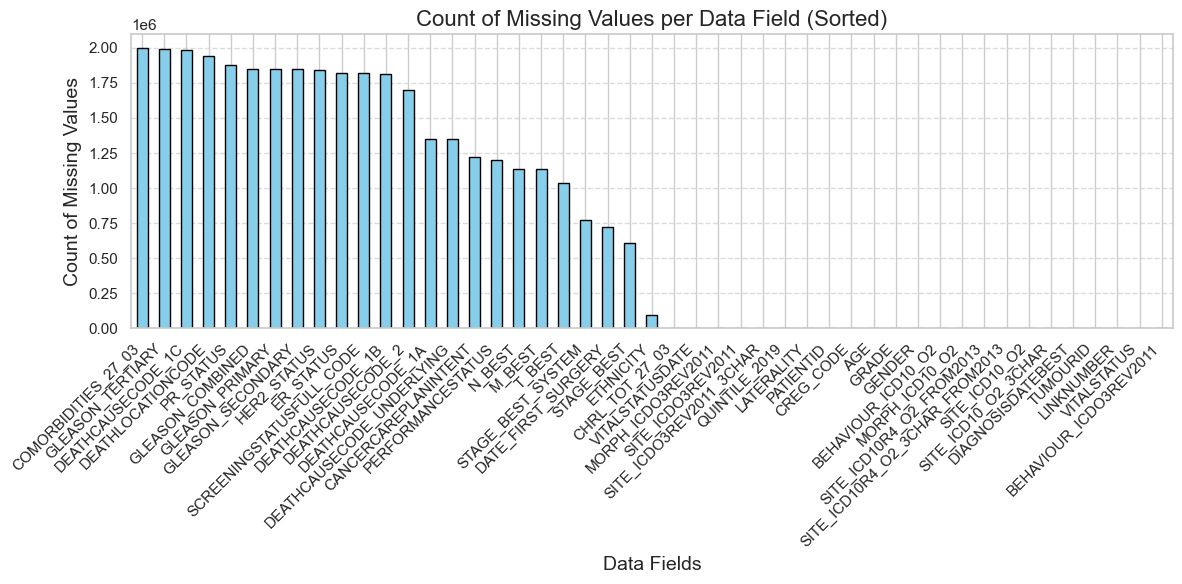

In [8]:
# ----------------------------
# Section 7: Summarise Missing Values
# ----------------------------
# Summarise missing values in the merged dataset
missing_values = merged_data.isnull().sum()
print("\nMissing values summary:")
print(missing_values[missing_values > 0])  # Show only fields with missing values

# Visualise missing values using a bar chart (sorted)
missing_values_sorted = missing_values.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
missing_values_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Count of Missing Values per Data Field (Sorted)", fontsize=16)
plt.xlabel("Data Fields", fontsize=14)
plt.ylabel("Count of Missing Values", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

##### Missing Values Summary

The table displays the number of missing values for each column in the `merged_data` dataset. Some key points:

- Columns like `DEATHCAUSECODE_1B`, `DEATHCAUSECODE_1C`, and `DEATHCAUSECODE_2` have a significant number of missing values, with over 1.3 million missing entries.
- The `COMORBIDITIES_27_03` column has no missing values, as indicated by the count of 1,995,570.
- Other columns like `ETHNICITY`, `VITALSTATUSDATE`, and `STAGE_BEST` also have substantial missing data.

##### Bar Chart
The bar chart provides a visual representation of the missing values across columns, sorted in descending order. This helps highlight which columns have the highest number of missing entries, with the largest missing data volumes appearing at the top of the chart. It also aids in identifying patterns and potential areas for data cleaning or imputation.

#### Data Cleaning

This section focuses on cleaning the `merged_data` dataset by:

1. **Defining Essential Columns**: A list of key columns is created to retain only the necessary data for further analysis.
2. **Cleaning the Dataset**: 
   - The dataset is filtered to include only the essential columns.
   - Duplicate rows are removed based on unique combinations of `PATIENTID` and `TUMOURID`.
3. **Reporting Results**: 
   - The shape of the cleaned dataset is printed.
   - Any remaining missing values in the cleaned dataset are summarised.

In [9]:
# ----------------------------
# Section 8: Data Cleaning
# ----------------------------
# Define essential columns
essential_columns = [
    "PATIENTID", "GENDER", "ETHNICITY", "DEATHLOCATIONCODE", "VITALSTATUS",
    "VITALSTATUSDATE", "TUMOURID", "DIAGNOSISDATEBEST", "BEHAVIOUR_ICD10_O2",
    "STAGE_BEST", "GRADE", "AGE", "LATERALITY", "CANCERCAREPLANINTENT",
    "PERFORMANCESTATUS", "CHRL_TOT_27_03", "COMORBIDITIES_27_03", "QUINTILE_2019"
]

# Clean dataset
merged_data = (merged_data[essential_columns]
              .drop_duplicates(subset=['PATIENTID', 'TUMOURID']))

# Report cleaning results
print(f"\nCleaned dataset shape: {merged_data.shape}")
print(f"Missing values after cleaning:")
print(merged_data.isnull().sum()[merged_data.isnull().sum() > 0])


Cleaned dataset shape: (1995570, 18)
Missing values after cleaning:
ETHNICITY                 97735
DEATHLOCATIONCODE       1938116
VITALSTATUSDATE            1969
STAGE_BEST               606659
CANCERCAREPLANINTENT    1223497
PERFORMANCESTATUS       1203232
CHRL_TOT_27_03             4331
COMORBIDITIES_27_03     1995570
dtype: int64


##### Output of Data Cleaning

After cleaning the dataset:

- **Dataset Shape**: The cleaned dataset now contains 1,995,570 rows and 18 columns.
- **Missing Values**: There still remain quite a few columns containing missing values - the entire missing values relating to the `COMORBIDITIES_27_03` column will be resolved further along in the script.
- **No Duplicate Records**: There were no duplicate entries based on the combination of `PATIENTID` and `TUMOURID`, ensuring that each patient and tumour pair is unique.

#### Section 9: Vital Status Year Breakdown

In this section:
- **VITALSTATUSYEAR Column**: A new column, `VITALSTATUSYEAR`, was created by extracting the year from the `VITALSTATUSDATE` column.
- **Vital Status Year Distribution**: A summary table was generated showing the count and percentage of patients for each year based on their `VITALSTATUSYEAR`. The distribution is presented in the output.

The table displays the number of patients per year, along with the percentage distribution across the dataset.

- **Bar Chart**: A bar chart visualising the distribution of patients per `VITALSTATUSYEAR` is provided. The x-axis represents the years, while the y-axis represents the count of patients. The chart includes gridlines for better readability and rotated x-axis labels for improved clarity.


Vital Status Year Distribution:
                   Count  Percentage
VITALSTATUSYEAR                     
2016.0             53324    2.672119
2017.0             94930    4.757037
2018.0            122907    6.158992
2019.0            148246    7.428755
2020.0            115346    5.780103
2021.0             81688    4.093467
2022.0           1377160   69.010859


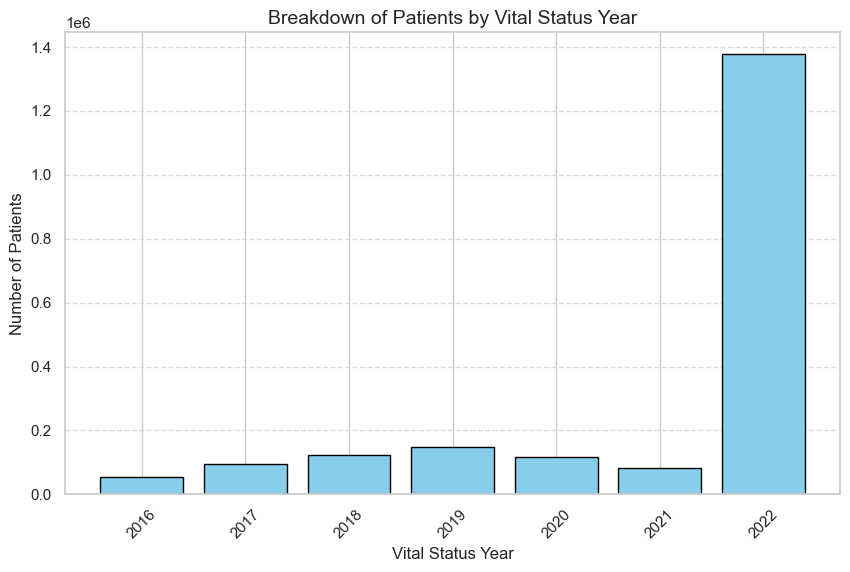

In [10]:
# ----------------------------
# Section 9: Create a New Column for the Year of VitalStatusDate and show the VITALSTATUSYEAR Breakdown
# ----------------------------
# Process vital status dates
merged_data['VITALSTATUSDATE'] = pd.to_datetime(merged_data['VITALSTATUSDATE'])
merged_data['VITALSTATUSYEAR'] = merged_data['VITALSTATUSDATE'].dt.year

# Analyse vital status year distribution
vital_status_summary = pd.DataFrame({
    "Count": merged_data['VITALSTATUSYEAR'].value_counts().sort_index(),
    "Percentage": (merged_data['VITALSTATUSYEAR'].value_counts().sort_index() / len(merged_data) * 100)
})

print("\nVital Status Year Distribution:")
print(vital_status_summary)

# Count occurrences of each VITALSTATUSYEAR
vital_status_counts = merged_data['VITALSTATUSYEAR'].value_counts().sort_index()

# Create a bar chart for the patient distribution per VITALSTATUSYEAR
plt.figure(figsize=(10, 6))
plt.bar(vital_status_counts.index, vital_status_counts.values, color='skyblue', edgecolor='black')
plt.xlabel("Vital Status Year", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.title("Breakdown of Patients by Vital Status Year", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Key Observations:
- **2022** stands out with a significantly higher count of patients (1,377,160), representing approximately 69% of the dataset. This suggests that most of the data records pertain to this year.
- **Earlier years** (2016–2021) show progressively lower counts, with a gradual decrease in the number of patients as the years go back. For example, 2019 had 148,246 patients, while 2016 had only 53,324 patients.
- The percentage distribution mirrors this trend, with 2022 making up the majority of the data.

##### Bar Chart Description:
The bar chart visualises the distribution of patients across each `VITALSTATUSYEAR`:

- The x-axis represents the years, ranging from 2016 to 2022.
- The y-axis represents the number of patients recorded for each year.
- A noticeable peak is observed for **2022**, indicating the highest count of patients, while the years 2016–2021 show lower, more evenly distributed counts.
- The chart likely shows a large concentration of data from 2022, suggesting a more recent focus or data availability for that year.

#### Section 10: Age and Sex Distribution of Patients

##### Summary Statistics:
The code calculates various descriptive statistics for the `AGE` of patients, grouped by `GENDER`. The following metrics are computed for both male and female patients:
- **Mean**: The average age.
- **Median**: The middle value of age.
- **Range**: The difference between the maximum and minimum ages.
- **Lower Quartile (Q1)**: The 25th percentile of age.
- **Upper Quartile (Q3)**: The 75th percentile of age.
- **Variance**: The degree of spread of the ages.
- **Standard Deviation**: The square root of the variance, indicating the spread of ages.
- **Mode**: The most frequent age, calculated separately from other statistics.

##### Visualisations:
Two visualisations are produced to further explore the age and sex distribution:
1. **Histogram**: Displays the distribution of ages for each gender with a KDE (Kernel Density Estimate) overlay to show the probability density of ages. The bars are colored based on gender.
2. **Box Plot**: Shows the spread of ages for each gender, with a visual representation of the median, quartiles, and potential outliers.

These plots help to visually compare the age distribution across genders and detect patterns such as skewness or outliers.


Age Statistics by Gender:

                                                                   Mean  Median  Range  Lower Quartile  Upper Quartile  Variance  Standard Deviation  Mode
GENDER                                                                                                                                                    
Female                                                            65.03    68.0    107           55.00           78.00    293.78               17.14    70
Indeterminate (Unable to be classified as either male or female)  85.50    85.5      9           83.25           87.75     40.50                6.36    81
Male                                                              69.10    71.0    106           62.00           79.00    219.13               14.80    72


C:\Users\dylanbai\AppData\Local\Temp\ipykernel_3980\420233716.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x="GENDER", y="AGE",


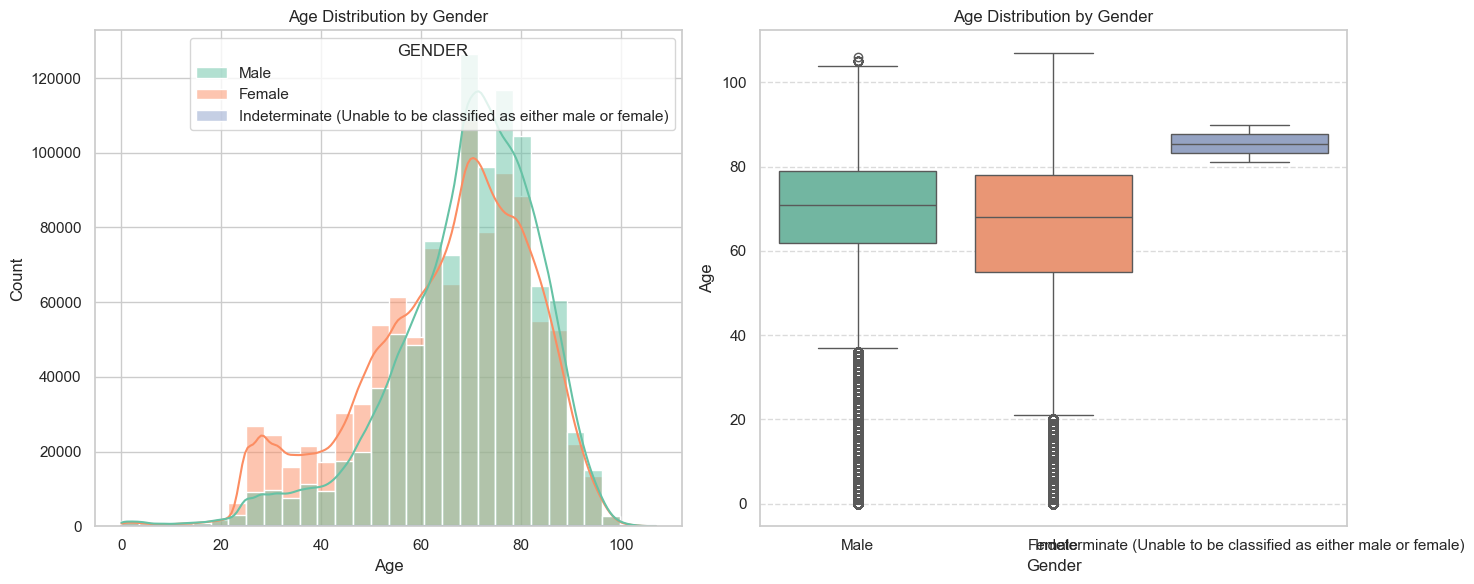

In [11]:
# ----------------------------
# Section 10.0: Summarise Age and Sex Distribution of Patients
# ----------------------------
def analyse_demographics(data, measure):
    """Calculate demographic statistics by gender."""
    # Calculate mode separately since it's not a direct aggregation method
    mode_by_gender = data.groupby('GENDER')[measure].agg(
        lambda x: x.mode().iloc[0] if not x.mode().empty else None
    )
    
    # Calculate other statistics
    stats = data.groupby('GENDER')[measure].agg([
        'mean',
        'median',
        lambda x: x.max() - x.min(),  # range
        lambda x: x.quantile(0.25),   # lower quartile
        lambda x: x.quantile(0.75),   # upper quartile
        'var',
        'std'
    ]).round(2)
    
    # Add mode to the statistics DataFrame
    stats['mode'] = mode_by_gender
    
    # Rename columns for clarity
    stats.columns = ['Mean', 'Median', 'Range', 
                    'Lower Quartile', 'Upper Quartile',
                    'Variance', 'Standard Deviation', 'Mode']
    
    return stats

# Generate age-sex distribution analysis
age_sex_stats = analyse_demographics(merged_data, 'AGE')

# Print the table in a single, structured format
print("\nAge Statistics by Gender:\n")
print(age_sex_stats.to_string())

# Create visualisations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
sns.histplot(data=merged_data, x='AGE', hue='GENDER', kde=True, 
             bins=30, palette="Set2", ax=ax1)
ax1.set_title("Age Distribution by Gender")
ax1.set_xlabel("Age")
ax1.set_ylabel("Count")

# Box plot
sns.boxplot(data=merged_data, x="GENDER", y="AGE", 
            palette="Set2", ax=ax2)
ax2.set_title("Age Distribution by Gender")
ax2.set_xlabel("Gender")
ax2.set_ylabel("Age")
ax2.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

##### Age Statistics by Gender Observations

##### Table Summary:
The table presents the summary statistics for the `AGE` field, which represents the age at which the patient was diagnosed with their tumour, grouped by `GENDER`. The statistics for each gender category are as follows:

##### Female:
- **Mean Age**: 65.03 years
- **Median Age**: 68 years
- **Age Range**: 107 years (difference between the oldest and youngest)
- **Lower Quartile (Q1)**: 55 years
- **Upper Quartile (Q3)**: 78 years
- **Variance**: 293.78, indicating a moderate spread in ages
- **Standard Deviation**: 17.14, reflecting how much the individual ages deviate from the mean
- **Mode**: 70 years, the most common age

##### Indeterminate (Unable to be classified as either male or female):
- **Mean Age**: 85.50 years
- **Median Age**: 85.5 years
- **Age Range**: 9 years (relatively small range)
- **Lower Quartile (Q1)**: 83.25 years
- **Upper Quartile (Q3)**: 87.75 years
- **Variance**: 40.50, indicating a very small spread in ages
- **Standard Deviation**: 6.36, which is much lower than the other gender groups
- **Mode**: 81 years, the most common age

##### Male:
- **Mean Age**: 69.10 years
- **Median Age**: 71 years
- **Age Range**: 106 years
- **Lower Quartile (Q1)**: 62 years
- **Upper Quartile (Q3)**: 79 years
- **Variance**: 219.13, reflecting a moderate spread in ages
- **Standard Deviation**: 14.80, suggesting moderate variation from the mean
- **Mode**: 72 years, the most common age

##### Insights:
- **Age of Tumour Diagnosis**: The `AGE` data field represents the age at which the patient was diagnosed with their tumour. The differences in age distributions between genders may provide insights into patterns of tumour diagnosis. For example, the slightly older mean age for males (69.10 years) compared to females (65.03 years) may suggest that, on average, males are diagnosed later, or that certain types of tumours are diagnosed later in life for males.
  
- **Age Differences in the Indeterminate Category**: The `Indeterminate` group has a much smaller range, variance, and standard deviation compared to both male and female categories, suggesting a narrower and more concentrated age distribution. This could be due to fewer data points in this group, but the higher average and mode age (85.5 years and 81 years) might indicate that tumours for this group tend to be diagnosed at a more advanced age. However, as the sample size for this group is small, these observations may not hold much accurary or reliability.

- **Age Spread and Tumour Diagnosis**: The relatively wide age spread and higher variance in the `Female` and `Male` categories suggest that tumour diagnoses occur across a broad age range, and possibly at different tumour stages. The fact that the age distribution is not tightly clustered could imply that the tumours studied here may not be specific to one age group, or could be related to various types of cancers that manifest at different ages.

- **Age Distribution Trends**: The median and mean ages for females (65.03 and 68) and males (69.10 and 71) suggest that tumour diagnoses are relatively common in older adults, but that there is still a significant variation in age at diagnosis. This spread indicates that factors such as lifestyle, genetics, and healthcare access could play roles in when patients are diagnosed. Additionally, we may need to factor in the attitude that younger individuals may be less inclined to receive doctor checkups for things such as tumours on account of being healthy due to being young.

##### Chart Descriptions:
1. **Histogram**: The histogram likely shows overlapping distributions of age for males and females, with the `Indeterminate` group being a smaller and more concentrated distribution. The KDE (Kernel Density Estimate) overlay helps to highlight the density of patients within specific age ranges. Peaks around the mode for each gender (70 for females, 72 for males, and 81 for indeterminate) would be visible in the distribution. This visual representation helps to see the clustering of diagnoses around certain ages and how the distributions compare across genders.

2. **Box Plot**: The box plot provides a visual summary of the age distribution for each gender. It will show that the `Indeterminate` group has a very tight spread, while males and females have a wider age range with more pronounced variation, evident in the larger boxes and whiskers. Outliers, if any, would also be highlighted, particularly in the male and female groups. This helps to identify the age ranges at which tumour diagnoses are more or less frequent and how the diagnosis age differs between genders.

#### Section 11: Distribution Analysis and Bar Chart Visualisation for Clinical Characteristics

##### Function Overview:
The `analyse_distribution` function is used to analyse and visualise the distribution of clinical characteristics across different columns in the dataset. It calculates the count and percentage distribution for each category within a specified column and creates a bar chart to represent the data visually. Additionally, it outputs a summary table with counts and percentages for each category in the distribution.

##### Process:
1. **Distribution Calculation**: For each column, the function calculates the count and percentage of each category present in the data.
2. **Summary Table**: A summary table is printed showing the count and percentage for each category.
3. **Bar Chart Visualisation**: A bar chart is created where the x-axis represents the categories, and the y-axis shows the count of occurrences. The bars are labelled with their respective percentages for easy interpretation.
4. **Common Category**: The function prints the most common category for each clinical characteristic.

##### Fields Analysed:
- **Behaviour** (`BEHAVIOUR_ICD10_O2`): Behaviour of the cancer, in the ICD-10/O2 system
- **Grade** (`GRADE`): Grade of tumour
- **Stage** (`STAGE_BEST`): Best ‘registry’ stage at diagnosis of the tumour

For each field, the distribution and the most common value are displayed, followed by a bar chart showing the frequency of each category along with the percentage of the total for that category.

##### Insights from Output:
- The summary table provides a clear breakdown of the frequency and relative percentage of each category in the clinical characteristics.
- The bar chart provides a visual comparison of the distribution, making it easier to identify the most common categories and the spread of data across different groups.


Behaviour Distribution:
                                                      Count  Percentage (%)
BEHAVIOUR_ICD10_O2                                                         
Malignant                                           1741769            87.3
In situ                                              174318             8.7
Uncertain                                             47790             2.4
Benign                                                18405             0.9
Malignant, metastatic / Secondary site                10032             0.5
Micro-invasive                                         2803             0.1
Malignant, uncertain whether primary or metastatic      453             0.0
Most Common Behaviour: Malignant


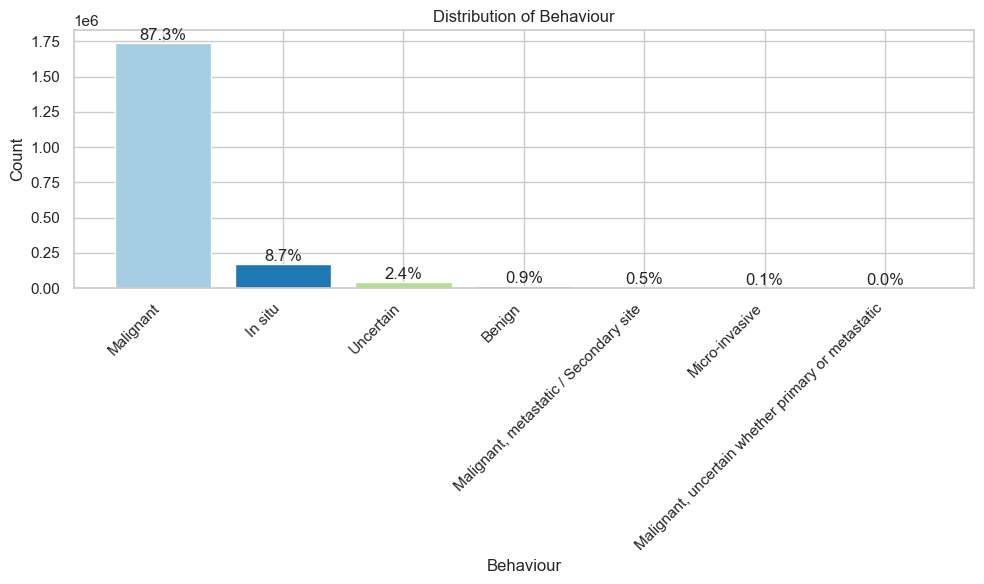


Grade Distribution:
                                                      Count  Percentage (%)
GRADE                                                                      
Grade of differentiation is not appropriate or ...  1188435            59.6
2 / II / Moderately differentiated                   311398            15.6
3 / III / Poorly differentiated                      213421            10.7
1 / I / Well differentiated                          105319             5.3
0 Borderline malignancy                               95257             4.8
High                                                  46463             2.3
4 / IV / Undifferentiated / Anaplastic                14775             0.7
Low                                                   12235             0.6
Intermediate                                           8267             0.4
Most Common Grade: Grade of differentiation is not appropriate or cannot be assessed


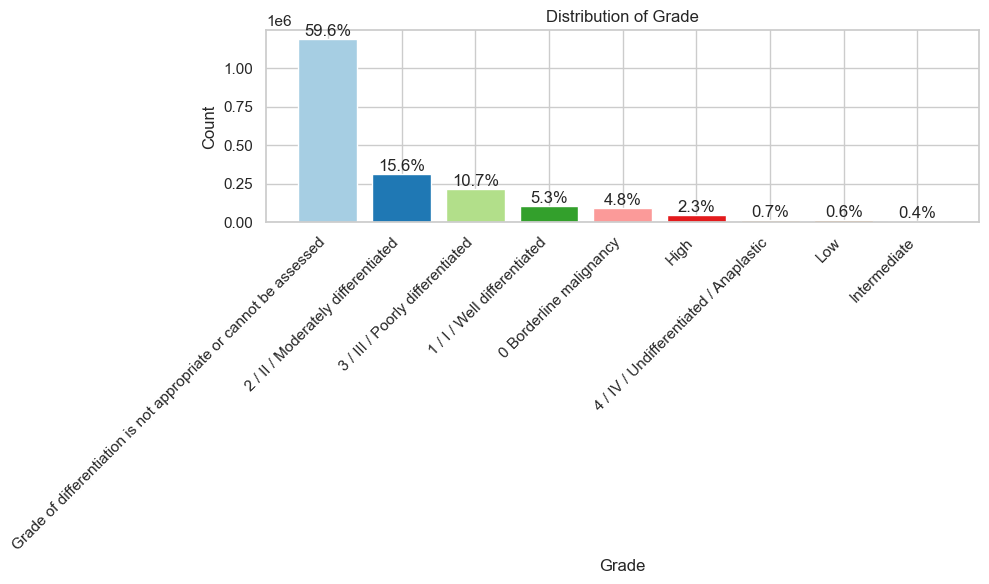


Stage Distribution:
                           Count  Percentage (%)
STAGE_BEST                                      
Insufficient information  686411            49.4
Stage 4                   178064            12.8
Stage 1                   151812            10.9
Unstageable               125132             9.0
Stage 3                    99470             7.2
Stage 2                    82359             5.9
Stage 0                    61003             4.4
RaiBinet stage              4631             0.3
Outdated or invalid code      19             0.0
Unmapped value                 9             0.0
Not staged                     1             0.0
Most Common Stage: Insufficient information


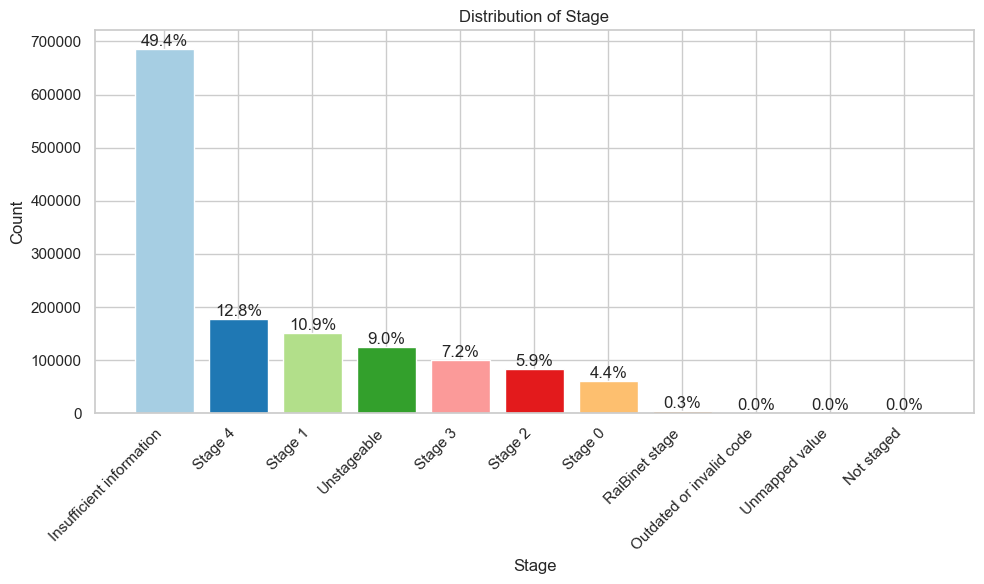

In [12]:
# ----------------------------
# Section 11: Distribution Analysis and Bar Chart Visualisation for other Data Fields
# ----------------------------
def analyse_distribution(data, column, title):
    """Analyse and visualise distribution of clinical characteristics."""
    # Calculate distribution
    distribution = data[column].value_counts()
    percentage = (distribution / distribution.sum() * 100).round(1)
    
    # Create summary table
    summary = pd.DataFrame({
        'Count': distribution,
        'Percentage (%)': percentage
    })
    
    print(f"\n{title} Distribution:")
    print(summary)
    print(f"Most Common {title}: {distribution.index[0]}")
    
    # Create visualisation
    plt.figure(figsize=(10, 6))
    bars = plt.bar(distribution.index, distribution.values, 
                   color=plt.cm.Paired.colors[:len(distribution)])
    
    # Add percentage labels
    for bar, pct in zip(bars, percentage):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                f'{pct}%', ha='center', va='bottom')
    
    plt.title(f"Distribution of {title}")
    plt.xlabel(title)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Analyse key clinical characteristics
for field, title in [
    ('BEHAVIOUR_ICD10_O2', 'Behaviour'),
    ('GRADE', 'Grade'),
    ('STAGE_BEST', 'Stage')
]:
    analyse_distribution(merged_data, field, title)

##### Distribution Analysis of Tumour Behaviour, Grade, and Stage

##### Behaviour Distribution:
The distribution of tumour behaviour shows that the majority of tumours in the dataset are classified as **Malignant** (87.3%). This suggests that most of the cases are aggressive or cancerous in nature, aligning with typical clinical expectations. The second most common category is **In situ** (8.7%), indicating pre-cancerous or early-stage tumours that are localised. Other categories, such as **Uncertain** (2.4%) and **Benign** (0.9%), represent less frequent tumour types. The presence of **Malignant, metastatic / Secondary site** (0.5%) highlights the spread of cancer to other parts of the body. The most common tumour behaviour is **Malignant**.

##### Grade Distribution:
The **Grade** distribution highlights that a significant portion of tumours are classified as having **"Grade of differentiation is not appropriate or cannot be assessed"** (59.6%), suggesting that the tumour's differentiation could not be determined for many cases, possibly due to insufficient data or tumour characteristics. The next most common categories are **Moderately differentiated (Grade 2/II)** (15.6%) and **Poorly differentiated (Grade 3/III)** (10.7%), which indicate a moderate to poor ability of the tumours to resemble the original tissue. Lower-grade categories, such as **Well differentiated (Grade 1/I)** (5.3%) and **Borderline malignancy** (4.8%), reflect tumours that may have a slower growth or are less aggressive. **High-grade** tumours (2.3%) and **Undifferentiated/Anaplastic** tumours (0.7%) are much less common, but they are typically more aggressive forms of cancer.

##### Stage Distribution:
The **Stage** distribution reveals that nearly half of the tumours are classified as having **Insufficient information** (49.4%). This may indicate missing or incomplete staging data in the dataset. The most commonly reported cancer stage is **Stage 4** (12.8%), suggesting that a considerable number of patients are diagnosed at an advanced stage, where cancer has likely spread to distant parts of the body. **Stage 1** (10.9%) and **Stage 3** (7.2%) are also significant, indicating that some tumours are detected early or at an advanced stage. **Stage 2** (5.9%) and **Stage 0** (4.4%) are less common but still notable for the earlier phases of cancer.

##### Insights:
- **Behaviour**: The majority of tumours are malignant, with a relatively small proportion being benign or uncertain. This is expected, as malignant tumours are the primary focus in cancer diagnosis and treatment.
- **Grade**: A large portion of tumours has an unclear grade, potentially indicating a lack of complete diagnostic information. The other grades suggest that tumours in this dataset range from well-differentiated (less aggressive) to poorly differentiated (more aggressive).
- **Stage**: The high percentage of tumours with insufficient staging information underscores a gap in the availability of complete clinical data, which may hinder the analysis of cancer progression. However, the representation of advanced stages, especially stage 4, suggests a significant number of patients are diagnosed at later stages, where treatment options are more limited.

##### Visualisation Description:
The bar charts for each of these characteristics would show the distribution of tumour behaviour, grade, and stage, with the height of each bar corresponding to the count of cases for each category. The percentage labels on top of the bars provide additional context by showing the relative proportion of each category. The visualisations would make it easier to spot the dominant categories, such as **Malignant** for behaviour, **Grade of differentiation is not appropriate** for grade, and **Insufficient information** for stage, while also highlighting less common categories.

#### Section 12: Comorbidity Analysis of Patients

##### Overview:
This section of the code focuses on processing and summarising comorbidity data from the `COMORBIDITIES_27_03` column in the tumour dataset. It involves cleaning the data, mapping numeric codes to descriptive comorbidity names, and generating a distribution of the comorbidities across patients.

##### Steps:
1. **Data Cleaning**: 
   - The `COMORBIDITIES_27_03` column is cleaned by removing unwanted characters (e.g., leading zeros) and splitting any multiple comorbidities (separated by commas) into individual entries.
   - This transformation allows each comorbidity to be treated as a separate row, ensuring accurate analysis.

2. **Mapping and Conversion**:
   - The comorbidities are converted to numeric values, and those that cannot be converted are ignored (`errors='coerce'`).
   - A lookup dictionary (`lookup_dicts['comorbidities']`) is used to map numeric codes to their corresponding descriptions, providing a more readable summary of the comorbidities.

3. **Comorbidity Count and Percentage**:
   - The frequency of each comorbidity is calculated, and the percentage of patients with each comorbidity is computed relative to the total number of comorbidities.

4. **Visualisation**:
   - A bar chart is generated to show the distribution of comorbidities, with each bar representing a different comorbidity and its corresponding count. The percentage of patients with each comorbidity is displayed above each bar for clarity.

##### Output:
- The **comorbidity counts** are printed, showing the most common comorbidities, along with their respective counts and percentages of the total.
- The **total count of comorbidities** across all patients with comorbidities documented in the original tumour dataset is also displayed.
- The bar chart visually demonstrates the prevalence of each comorbidity, aiding in the understanding of common health conditions present alongside tumour diagnoses.

##### Insights:
- The comorbidities summary provides valuable insight into the general health conditions of tumour patients, which could be important for understanding patient outcomes and potential treatment complications.
- The visualisation allows for easy comparison of the frequency of various comorbidities, highlighting any dominant health issues across the patient population.

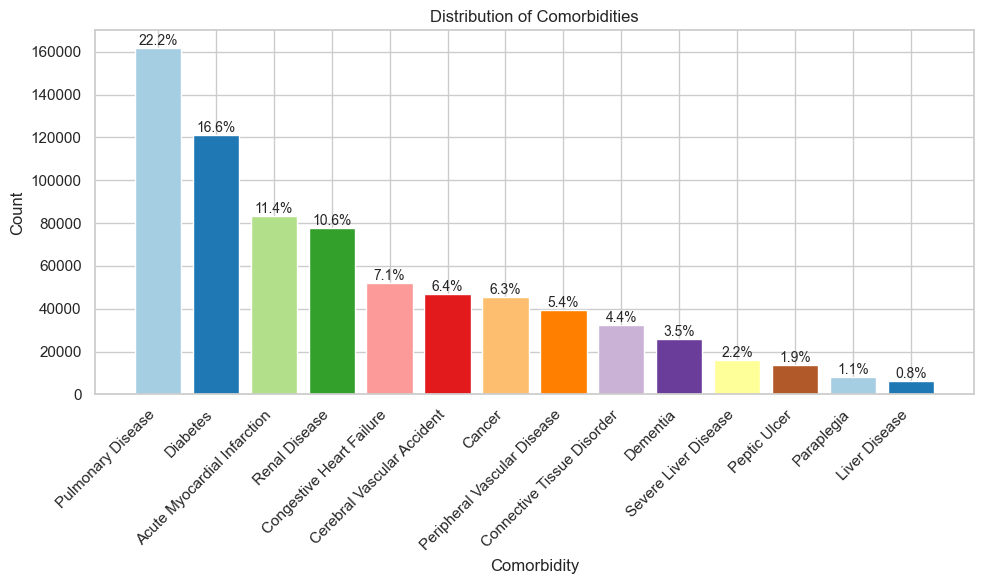


Comorbidities Summary:
                  Comorbidities   count  PERCENTAGE
0             Pulmonary Disease  161863   22.162206
1                      Diabetes  121223   16.597796
2   Acute Myocardial Infarction   83241   11.397319
3                 Renal Disease   77696   10.638100
4      Congestive Heart Failure   51798    7.092158
5    Cerebral Vascular Accident   46983    6.432890
6                        Cancer   45702    6.257496
7   Peripheral Vascular Disease   39632    5.426395
8    Connective Tissue Disorder   32447    4.442628
9                      Dementia   25643    3.511027
10         Severe Liver Disease   15936    2.181950
11                 Peptic Ulcer   13645    1.868267
12                   Paraplegia    8348    1.143004
13                Liver Disease    6199    0.848764
Total count of comorbidities: 730356


In [13]:
# ----------------------------
# Section 12: Summarise Comorbidities of Patients
# ----------------------------
# Clean 'COMORBIDITIES_27_03' column
# Remove unwanted characters, leading zeros, and split multiple values
comorbidities_expanded = (
    tumours[['PATIENTID', 'COMORBIDITIES_27_03']]
    .astype(str)
    .assign(COMORBIDITIES_27_03=lambda df: df['COMORBIDITIES_27_03']
            .str.replace(r"['0]", "", regex=True)
            .str.lstrip('0')
            .str.split(','))
    .explode('COMORBIDITIES_27_03')
    .reset_index(drop=True)
)

# Convert to numeric, drop NaNs, and map to descriptions
comorbidities_expanded['COMORBIDITIES_27_03'] = (
    pd.to_numeric(comorbidities_expanded['COMORBIDITIES_27_03'], errors='coerce', downcast='integer')
    .map(lookup_dicts['comorbidities'])
    .dropna()
)

# Summarise comorbidity counts and percentages
comorbidity_counts = (
    comorbidities_expanded['COMORBIDITIES_27_03']
    .value_counts()
    .reset_index()
    .rename(columns={'COMORBIDITIES_27_03': 'Comorbidities', 'index': 'COMORBIDITY'})
)
comorbidity_counts['PERCENTAGE'] = (comorbidity_counts['count'] / comorbidity_counts['count'].sum()) * 100

# Plot distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(comorbidity_counts['Comorbidities'], comorbidity_counts['count'], color=plt.cm.Paired.colors[:len(comorbidity_counts)])
plt.xlabel('Comorbidity')
plt.ylabel('Count')
plt.title('Distribution of Comorbidities')
plt.xticks(rotation=45, ha='right')
for bar, percentage in zip(bars, comorbidity_counts['PERCENTAGE']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

# Display results
print("\nComorbidities Summary:")
print(comorbidity_counts)
print(f"Total count of comorbidities: {comorbidity_counts['count'].sum()}")

##### Comorbidity Breakdown:

The **table** provides a ranked list of comorbidities, along with their counts and corresponding percentages:

1. **Pulmonary Disease**: The most prevalent comorbidity, found in 22.2% of patients, affecting 161,863 individuals.
2. **Diabetes**: Present in 16.6% of patients, with 121,223 cases, showing a significant co-occurrence with tumours.
3. **Acute Myocardial Infarction (Heart Attack)**: Observed in 11.4% of patients, affecting 83,241 individuals.
4. **Renal Disease**: Affected 77,696 patients, representing 10.6% of the total comorbidity cases.
5. **Congestive Heart Failure**: Present in 7.1% of patients, with 51,798 occurrences.
6. **Cerebral Vascular Accident (Stroke)**: Seen in 6.4% of patients, with 46,983 cases.

These comorbidities, particularly pulmonary disease, diabetes, and heart conditions, suggest that patients with tumours may experience a higher burden of chronic diseases, which could influence their treatment options, prognosis, and overall health management.

##### Visualisation:

The **bar chart** visually represents the distribution of these comorbidities. Each bar corresponds to a different comorbidity, with the height indicating the number of patients affected. The chart also includes percentage labels at the top of each bar, showing the proportion of patients with each condition relative to the total count of comorbidities (730,356). 

Key insights from the chart:
- **Pulmonary disease** stands out as the most common comorbidity, dominating the chart in both count and percentage.
- **Diabetes** and **heart-related conditions (myocardial infarction and congestive heart failure)** also appear prominently, highlighting major areas of concern for coexisting chronic conditions.
- The **tail end of the distribution** includes less common comorbidities such as **liver disease** and **paraplegia**, suggesting that while these conditions are less frequent, they still play a role in the health profile of tumour patients.

##### Insights:
- The presence of **pulmonary disease, diabetes, and heart-related conditions** in a significant proportion of patients may indicate that these patients require specialised management to address both tumour treatment and the associated comorbidities.
- The analysis helps in understanding the **complexity** of treating tumour patients who often face multiple health challenges.
- The chart serves as an easy reference for identifying the most common comorbidities and their prevalence, assisting healthcare professionals in anticipating complications during treatment.
- **Important Consideration**: The original **comorbidities data column** could contain patients with multiple comorbidities, and this analysis does not reflect this aspect. Therefore, some patients could be afflicted with both tumours and multiple comorbidities. This introduces a critical question: **Do tumours cause comorbidities**, or is it **poor health habits** that lead to the rise of comorbidities, which in turn **increase the risk of cancer and tumours**? It would be worthwhile to investigate this further by examining for each patient whether the tumour or comorbidity was diagnosed first, as this may provide important insights into the relationship between tumour development and co-occurring health conditions.

#### Section 13: Ethnicity and Income-Level Analysis

##### Overview:
This section examines the relationship between ethnicity and income levels, focusing on the most deprived income group and the proportion of lower-income earners across different ethnicities.

##### 13a) Ethnicity Distribution in the Most Deprived Income Group:

- **Data Cleaning**: The income data in the `QUINTILE_2019` column is cleaned by extracting the first character of the income quintile and converting it to an integer.
- **Analysis**: The most deprived income group is identified by filtering for the first income quintile (QUINTILE_2019 == 1). The ethnic distribution within this group is calculated, and the percentage of each ethnicity is determined.
- **Top Ethnicities**: The top 4 ethnicities are identified, and the remainder is grouped into an "OTHER" category.
- **Pie Chart**: A pie chart is created to visualise the ethnic distribution in the most deprived income group, showing the relative percentages of the top ethnicities and the "OTHER" category.

##### 13b) Ethnic Groups with a Higher Proportion of Lower Income Earners:

- **Lower Income Group Definition**: Lower income earners have been assumed to be represented as those in the first two income quintiles (QUINTILE_2019 <= 2).
- **Proportion Calculation**: The proportion of lower income earners within each ethnic group is calculated by dividing the number of lower income earners in each ethnic group by the total population of that group.
- **Summary Table**: A summary table is created to display the proportion of lower income earners and the total population count for each ethnicity.
- **Filtering**: The analysis is filtered to include only ethnic groups with a total population of at least 5,000 individuals. This is due to the fact that when this filter is not put in place the top ethnic group is represented by a unrepresentative sample size of 3.
- **Bar Chart**: A bar chart is generated to show the proportion of lower income earners for each ethnic group with a population count >= 5,000, with percentages displayed above the bars.

##### Key Insights:
- **Most Deprived Group**: The pie chart highlights the ethnic distribution within the most deprived income group, showing the relative percentages of ethnicities in this socio-economic category.
- **Proportion of Lower Income Earners**: The table and bar chart provide a detailed breakdown of ethnic groups with a higher proportion of lower income earners. This is valuable for understanding socio-economic disparities across ethnicities.
- **Filter by Population Size**: The filtering step ensures that only ethnic groups with a significant population are considered, providing more reliable insights.

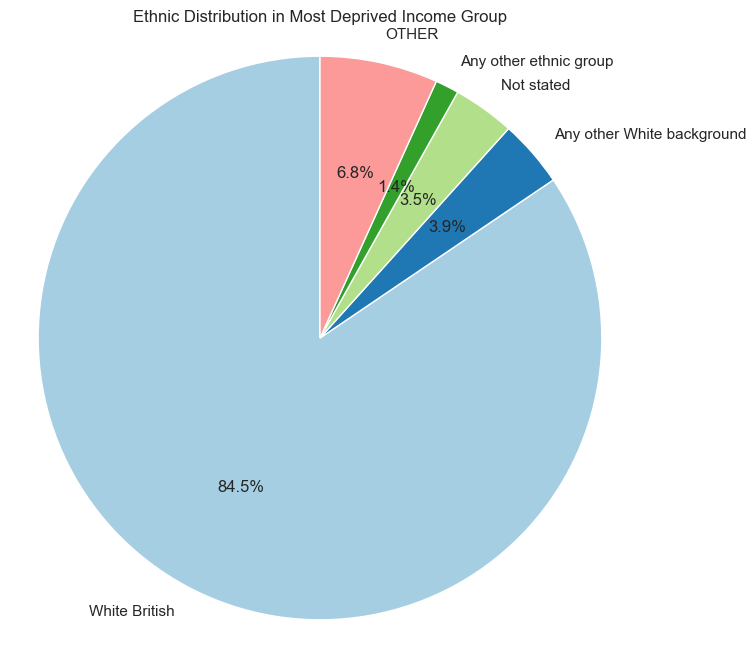


Ethnic groups with a higher proportion of lower income earners:
                            Proportion of lower income earners  \
ETHNICITY                                                        
English                                               0.500000   
Asian Pakistani                                       0.411060   
Asian Bangladeshi                                     0.404011   
Black African                                         0.402006   
White and Black African                               0.401180   
Chinese                                               0.400796   
Any other Asian background                            0.398241   
Black Caribbean                                       0.394203   
Any other Black background                            0.392727   
Any other ethnic group                                0.378178   
White Irish                                           0.378051   
Any other mixed background                            0.374824   
White and B

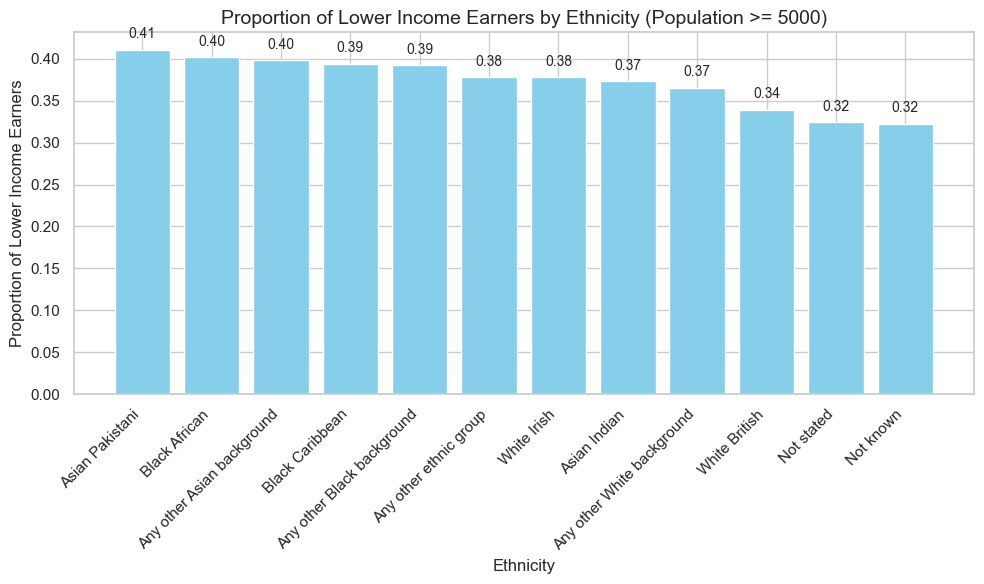

In [14]:
# ----------------------------
# Section 13: Ethnicity and Income-Level Analysis
# ----------------------------
# Clean income data
merged_data['QUINTILE_2019'] = merged_data['QUINTILE_2019'].str[0].astype(int)

# 13a) Summarise the percentage of each ethnic group for the most deprived income-level group
# Analyse most deprived group
most_deprived = merged_data[merged_data['QUINTILE_2019'] == 1]
ethnicity_deprived = most_deprived['ETHNICITY'].value_counts()
ethnicity_deprived_pct = (ethnicity_deprived / len(most_deprived) * 100).round(1)

# Get top ethnicities and combine others
top_ethnicities = ethnicity_deprived_pct.nlargest(4)
other_pct = ethnicity_deprived_pct[~ethnicity_deprived_pct.index.isin(top_ethnicities.index)].sum()
final_distribution = pd.concat([top_ethnicities, pd.Series({'OTHER': other_pct})])

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(final_distribution, labels=final_distribution.index, 
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors[:5])
plt.title('Ethnic Distribution in Most Deprived Income Group')
plt.axis('equal')
plt.show()

# 13b) Identify ethnic groups with a higher proportion of lower income earners
# Define lower income earners - I have made the assumption of defining this as QUINTILE_2019 <= 2
lower_income = merged_data[merged_data['QUINTILE_2019'] <= 2]

# Calculate the total ethnic population for each ethnic group
ethnicity_total_population = merged_data.groupby('ETHNICITY').size()

# Calculate the proportion of lower income earners within each ethnic group
ethnicity_lower_income = lower_income.groupby('ETHNICITY').size() / ethnicity_total_population

# Create a summary DataFrame
ethnicity_summary = pd.DataFrame({
    'Proportion of lower income earners': ethnicity_lower_income,
    'Total population count': ethnicity_total_population
})

# Display the original result as a table
print("\nEthnic groups with a higher proportion of lower income earners:")
print(ethnicity_summary.sort_values(by='Proportion of lower income earners', ascending=False))

# -----------------------------
# Additional filtering for population count >= 5000
# -----------------------------
# Filter to include only ethnic groups with a total population count of at least 5,000
ethnicity_summary_filtered = ethnicity_summary[ethnicity_summary['Total population count'] >= 5000]

# Sort by proportion of lower income earners in descending order
ethnicity_summary_sorted = ethnicity_summary_filtered.sort_values(by='Proportion of lower income earners', ascending=False)

# Display the result for filtered groups with population >= 5000
print("\nEthnic groups with a higher proportion of lower income earners (Population count >= 5000):")
print(ethnicity_summary_sorted)

# Step to create the bar chart for Proportion of Lower Income Earners
plt.figure(figsize=(10, 6))
plt.bar(ethnicity_summary_sorted.index, ethnicity_summary_sorted['Proportion of lower income earners'], color='skyblue')
plt.title('Proportion of Lower Income Earners by Ethnicity (Population >= 5000)', fontsize=14)
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Proportion of Lower Income Earners', fontsize=12)
plt.xticks(rotation=45, ha='right')
# Display the percentage on top of each bar
for i, v in enumerate(ethnicity_summary_sorted['Proportion of lower income earners']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent label cut-off
plt.show()

##### Ethnic Distribution and Income-Level Analysis

##### 1) Ethnic Distribution in the Most Deprived Income Group:
The table shows the ethnic distribution of individuals in the most deprived income group (QUINTILE_2019 = 1). The ethnicities and their corresponding proportions are as follows:

- **White British**: 81.1% - This group represents the vast majority of individuals in the most deprived income group.
- **Any Other White Background**: 3.7% - A smaller proportion, but still a notable percentage of the group.
- **Not Stated**: 3.4% - Individuals with unspecified ethnicity, indicating potential gaps in data reporting.
- **Any Other Ethnic Group**: 1.3% - A minor proportion.
- **OTHER**: 6.5% - Represents other ethnicities.

###### **Implications for Tumours and Health**:
The dominance of the **White British** group in the most deprived income group may suggest that socio-economic factors such as deprivation and health disparities are prevalent across a wider proportion of this ethnicity. The impact of socioeconomic status (SES) on tumour incidence could be further explored in this group, with potential links between deprivation, lifestyle factors, and health outcomes. Tumour risks may vary across ethnicities due to differences in genetics, health access, and environmental factors. An important consideration to this is that the **White British** group also represents the majority portion of our dataset, therefore, on account of sheer numbers, it would make sense that they would also represent the majority of the most deprived income group.

---

##### 2) Ethnic Groups with a Higher Proportion of Lower Income Earners:
This section shows the ethnicities with the highest proportion of lower-income earners (QUINTILE_2019 <= 2), with each ethnicity's proportion of lower-income earners and their total population count.

- **Top Proportions**:
    - **English**: 50% of this group is in lower-income brackets, though the total population is very small (only 2 individuals).
    - **Asian Pakistani**: 41.1% of this group is classified as lower-income, with a total of 9,928 individuals.
    - **Asian Bangladeshi**: 40.4% of this group, with a total of 3,042 individuals.
    - **Black African**: 40.2% of this group, with 10,271 individuals.
    - **Other ethnicities**, such as **Chinese**, **Black Caribbean**, and **Asian Indian**, also show significant proportions of lower-income earners.

- **Lower Proportions**:
    - **White British**: 33.9% of this group are lower-income earners, with a significantly larger population count of 1,626,138 individuals.
    - **Polish** and **Turkish** populations are too small to determine any meaningful analysis.

###### **Important Consideration**:
The results from this analysis cannot be taken with full reliability, as some of the ethnic groups with higher proportions of lower-income earners have underrepresented sample sizes. For instance, the **English** group, with only 2 individuals, and other groups with smaller populations, may not provide robust conclusions due to their insufficient sample size.

###### **Implications for Tumours and Health**:
Ethnic groups such as **Asian Pakistani**, **Black African**, and **Black Caribbean** have a higher proportion of lower-income earners, which could point to a link between socio-economic deprivation and health risks, including cancer. Socio-economic factors such as access to healthcare, lifestyle choices, and early detection of tumours may differ across these groups, contributing to varying cancer risks. The **White British** group, despite having a lower proportion of lower-income earners, represents a much larger population, suggesting that broader socio-economic health disparities might also exist within this ethnic group.

---

##### 3) Ethnic Groups with a Higher Proportion of Lower Income Earners (Population Count >= 5000):
When considering only those ethnicities with a population count of at least 5,000 individuals, the analysis shows:

- **Asian Pakistani**: 41.1% of this group is lower-income.
- **Black African**: 40.2% of this group is lower-income.
- **Black Caribbean**: 39.4% of this group is lower-income.
- **White British**: 33.9% of this group is lower-income, but due to its large population, this group still represents a significant number of lower-income individuals.
- **Asian Indian**: 37.3% of this group is lower-income.

###### **Implications for Tumours and Health**:
This filtered list provides a more reliable analysis of ethnic groups with a higher proportion of lower-income earners, focusing on groups with sufficient population size. These findings are particularly important for understanding how socio-economic deprivation may impact health outcomes like tumour and cancer risk. A more targeted analysis of healthcare access, prevention, and risk factors can be developed for these ethnic groups, offering a clearer picture of the potential health disparities.

---
##### Key Takeaways from the Charts:
- The **pie chart** visually represents the ethnic distribution in the most deprived income group, emphasising the dominance of the **White British** group.
- The **bar chart** for ethnic groups with a higher proportion of lower-income earners showcases the differences across ethnicities in terms of socio-economic status and its possible link to cancer risks.